In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
np.random.seed(42)

In [2]:
# Generamos una serie temporal
# Parámetros
dias = pd.date_range(start="2024-01-01", periods=365, freq="D")
a0 = 80  # Componente constante
a1 = 60 * np.cos(2 * np.pi * np.arange(365) / 365)  # Componente de tendencia, amplitud 60 (vertical), 1 ciclo
a2 = 15 * np.sin(2 * np.pi * np.arange(365) * 14 / 365)  # Componente estacional, amplitud 15 (vertical), 14 ciclos
ruido = np.random.normal(0, 12, len(dias))  # Ruido aleatorio, std error 12

# Serie combinada
serie_temporal = pd.Series(a0 + a1 + a2 + ruido, index=dias)

# Filtros
ma7 = serie_temporal.rolling(window=7, center=True).mean()

residual_ma7 = serie_temporal - ma7

ma21 = serie_temporal.rolling(window=21, center=True).mean()

residual_ma21 = serie_temporal - ma21

residual_ma21_ma7 = ma7 - ma21

## Serie Original y MA7:
Serie suavizada, destacando patrones a largo plazo (semanales). **Elimina el ruido "intrasemanal", del día a día**.

## Residual de MA7
La señal después de eliminar las tendencias, **permitiendo ver así las fluctuaciones diarias**.

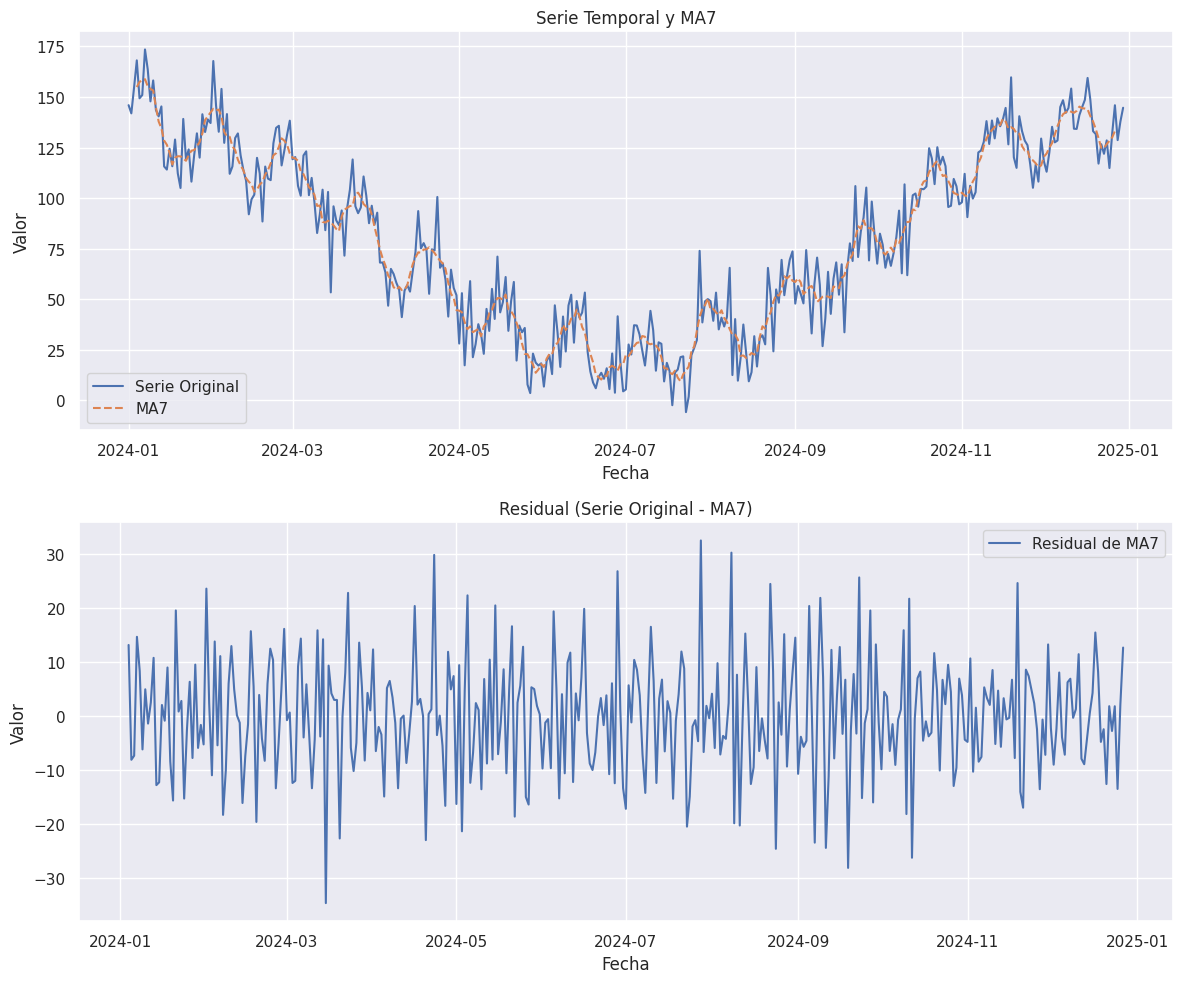

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Serie Original y MA7
sns.lineplot(x=dias, y=serie_temporal, label='Serie Original', ax=axes[0])
sns.lineplot(x=dias, y=ma7, label='MA7', linestyle='--', ax=axes[0])
axes[0].set_title('Serie Temporal y MA7')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend()

# Residual de MA7
sns.lineplot(x=dias, y=residual_ma7, label='Residual de MA7', ax=axes[1])
axes[1].set_title('Residual (Serie Original - MA7)')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Valor')
axes[1].legend()

plt.tight_layout()
plt.show()